

# Install Package

!pip install Sastrawi !pip install plotly !pip install nltk !pip install tqdm !pip install gensim

In [1]:
!pip install Sastrawi
!pip install plotly

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import re
import string
import random
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


import nltk
from nltk.corpus import stopwords

from tqdm import tqdm
import os

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

     |████████████████████████████████| 215kB 12.5MB/s 


## Mounted Drive & Load Dataset





In [2]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import tensorflow as tf
df = pd.read_csv("/content/drive/MyDrive/Big Data Eka/Train9.csv", usecols=["label", "reviewText", "selected_text" ])

In [23]:
df

,label,reviewText,selected_text
0,2,PIECE OF PARADISE - The first and only release...,piece paradise first release broken duo sky su...
1,2,Action/Adventure mixed with a wild (but realis...,actionadventure mixed wild realistic view futu...
2,2,This book portrays the thoughts and experience...,book portrays thoughts experiences hospice vol...
3,1,If you want detailed information on caring for...,want detailed information caring dying look el...
4,2,Awesome clipper but the attachments suck compa...,awesome clipper attachments suck compared ones...
...,...,...,...
399994,1,The high chair looks great when it first comes...,high chair looks great first comes box hill im...
399995,1,I have used this highchair for 2 kids now and ...,used highchair kids finally decided sell like ...
399996,1,"We have a small house, and really wanted two o...",small house really wanted two high chairs twin...
399997,1,not sure what this book is supposed to be. It ...,sure book supposed really rehash old ideas car...


In [24]:
df.isnull().sum()

label            0
reviewText       0
selected_text    1
dtype: int64

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 399999 entries, 0 to 399998
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   label          399999 non-null  int64 
 1   reviewText     399999 non-null  object
 2   selected_text  399998 non-null  object
dtypes: int64(1), object(2)
memory usage: 9.2+ MB


In [26]:
 df.label.value_counts()

1    202581
2    197418
Name: label, dtype: int64

In [27]:
temp = df.groupby('label').count()['reviewText'].reset_index().sort_values(by='reviewText',ascending=False)
temp.style.background_gradient(cmap='Blues')

,label,reviewText
0,1,202581
1,2,197418


In [28]:
temp = df.groupby('label').count()['selected_text'].reset_index().sort_values(by='selected_text',ascending=False)
temp.style.background_gradient(cmap='Blues')

,label,selected_text
0,1,202580
1,2,197418


In [29]:
# untuk melihat label yang berkategory 2
df[df["label"] == 2] ["reviewText"].values[2]

'This book portrays the thoughts and experiences of a hospice volunteer. A very good read especially for those contemplating on volunteering in this field.'

In [32]:
# untuk melihat label yang berkategory 2
df[df["label"] == 2] ["selected_text"].values[1]

'actionadventure mixed wild realistic view future like aviation golf technology action making obscene amounts money youll love novel michael crichton tom clanceyish story packed pages entertaining tons technical meat thoroughly entertained got bit smarter process might become worlds first trillionaire'

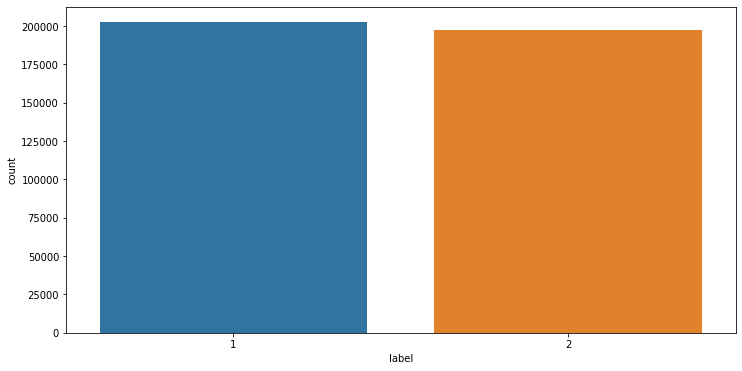

In [33]:
# menampilkan data 
plt.figure(figsize=(12,6))
sns.countplot(x='label',data=df)
#ternyata data inbalanced

In [34]:
fig = go.Figure(go.Funnelarea(
    text =temp.label,
    values = temp.selected_text,
    title = {"position": "top center", "text": "Funnel-Chart of Category Distribution"}
    ))
fig.show()

In [35]:
df['explore_list'] = df['reviewText'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,the,1297659
1,and,790591
2,I,745636
3,to,732353
4,a,714315
5,of,565390
6,is,504748
7,it,424749
8,this,395231
9,in,320868


In [16]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,191279
1,one,143259
2,like,113784
3,good,94027
4,movie,89794
5,would,88473
6,great,87951
7,read,71774
8,get,70675
9,time,68100


In [17]:
df['explore_list'] = df['selected_text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in df['explore_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']
temp.style.background_gradient(cmap='Blues')

,Common_words,count
0,book,191279
1,one,143259
2,like,113784
3,good,94027
4,movie,89794
5,would,88473
6,great,87951
7,read,71774
8,get,70675
9,time,68100


In [18]:
# show the missing values
num_missing_text = np.sum(df['selected_text'].isnull())
print('missing values: {}'.format(num_missing_text))

missing values: 3


In [19]:
import nltk
nltk.download('punkt')
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### **Preprocessing**

In [ ]:
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopword_id(text):    
  
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['yg','ga','gak', 'tdk','nya','ada','tidak','baik']

    # Merge stopword
    data = stop_factory #+ more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text
#     return [word for word in text if word not in stopwords.words('indonesian')]

def remove_stopword_eng(text):
    return [word for word in text if word not in stopwords.words('english')]

def remove_stopword_in(text):    
    # Ambil Stopword bawaan
    stop_factory = StopWordRemoverFactory().get_stop_words()
    #more_stopword = ['ada','tidak','baik','yg','ga','gak', 'tdk','nya']

    # Merge stopword
    data = stop_factory + more_stopword
    dictionary = ArrayDictionary(data)
    str = StopWordRemover(dictionary)
    text = str.remove(text)
    return text

def remove_stopword(text):
    #text = [word for word in text if word not in stopwords.words('indonesian')]
    text = [word for word in text if word not in stopwords.words('english')]
    return text

def clean_text(text):
    # lower text/case folding
    text = text.lower()
    # remove tab, new line, ans back slice
    text = text.replace('\\t'," ").replace('\\n'," ").replace('\\u'," ").replace('\\',"")
    # remove non ASCII (emoticon, chinese word, .etc)
    text = text.encode('ascii', 'replace').decode('ascii')
    # remove mention, link, hashtag
    text = ' '.join(re.sub("([@#][A-Za-z0-9]+)|(\w+:\/\/\S+)"," ", text).split())
    #remove multiple whitespace into single whitespace
    text = re.sub('\s+',' ',text)
    #remove puncutation
    text = text.translate(str.maketrans("","",string.punctuation))
    text = word_tokenize(text)
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = remove_stopword_eng(text)
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = " ".join(text)
    return(text)    

#print('step 1')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
#test["selected_text"] = test["selected_text"].apply(lambda x: clean_text(x))

print('step 2')
# clean test dataset and stop word
#test["selected_text"] = test["reviewText"].apply(lambda x: remove_stopword_eng(x))
df["selected_text"] = df["reviewText"].apply(lambda x: clean_text(x))
print('done')

print('step 3')
#Create and save data to file csv
submission = pd.DataFrame({'label':df['label'],'reviewText':df['reviewText'],'selected_text':df['selected_text']})
# submission.head()
# filename = '[Sahabat Data]-Notebookv5.csv'
filename = '.csv'
submission.to_csv(filename,index=False)

print('Saved file: ' + filename)

#move file to drive
!mv /content/Train2.csv /content/drive/MyDrive/"Big Data Eka"/
print('Done')

step 2
done
step 3
Saved file: train_1.csv
mv: cannot stat '/content/Train2.csv': No such file or directory
Done


In [ ]:
df.head()

,label,reviewText,selected_text,explore_list
0,2,This sound track was beautiful! It paints the ...,sound track beautiful paints senery mind well ...,"[sound, track, beautiful, paints, senery, mind..."
1,2,I'm reading a lot of reviews saying that this ...,im reading lot reviews saying best game soundt...,"[im, reading, lot, reviews, saying, best, game..."
2,2,This soundtrack is my favorite music of all ti...,soundtrack favorite music time hands intense s...,"[soundtrack, favorite, music, time, hands, int..."
3,2,I truly like this soundtrack and I enjoy video...,truly like soundtrack enjoy video game music p...,"[truly, like, soundtrack, enjoy, video, game, ..."
4,2,"If you've played the game, you know how divine...",youve played game know divine music every sing...,"[youve, played, game, know, divine, music, eve..."


In [ ]:
final_clean = pd.DataFrame({'label':df['label'],'reviewText':df['selected_text']})
final_clean.head()
filename = 'Salinan Train1.csv'

final_clean.to_csv(filename,index=False)

print('Saved file: ' + filename)

#move file to drive
!mv /content/'Salinan Train1.csv' /content/drive/MyDrive/"Stemming"/
print('Done')

Saved file: Salinan Train1.csv
Done


In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/Stemming/Salinan Train1.csv")

In [ ]:
df_clean.head()

,label,reviewText
0,2,sound track beautiful paints senery mind well ...
1,2,im reading lot reviews saying best game soundt...
2,2,soundtrack favorite music time hands intense s...
3,2,truly like soundtrack enjoy video game music p...
4,2,youve played game know divine music every sing...


In [ ]:
df_clean.isnull().sum()

label         0
reviewText    3
dtype: int64